<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter3/CEnoisy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.11


# Example 3.5
## Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
print(np.__version__)

1.19.5


## Set random seed

In [3]:
np.random.seed(120)

## Original function Snoisy

In [4]:
def Snoisy(X):   #takes a matrix
    n = X.shape[1]
    N = X.shape[0]
    xorg = np.hstack((np.ones((1,n//2)), np.zeros((1,n//2)))) #true binary vector
    theta = 0.4 # probability to flip the input
    s = np.zeros(N)  #storing the number of bits unequal to the true vector
    for i in range(0,N):
       flip = (np.random.uniform(size=(n)) < theta).astype(int) # determine which bits to flip
       ind = flip>0
       X[i][ind] = 1-X[i][ind]
       s[i] = (X[i] != xorg).sum()
    return s

## Original program CEnoisy.py

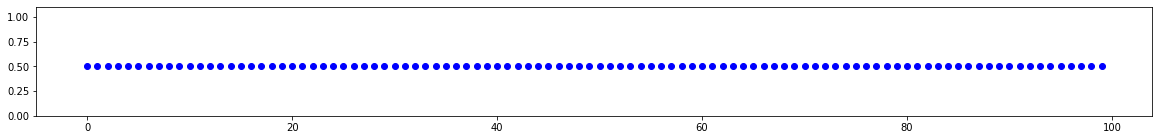

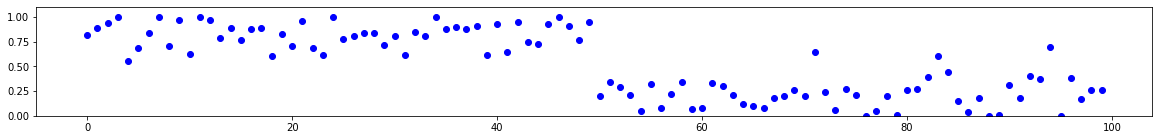

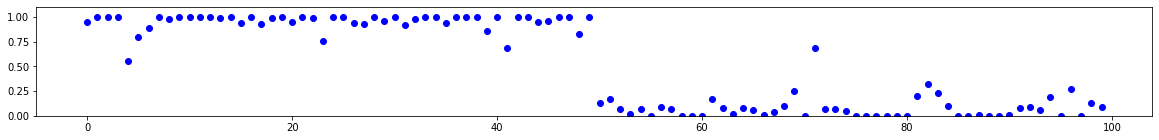

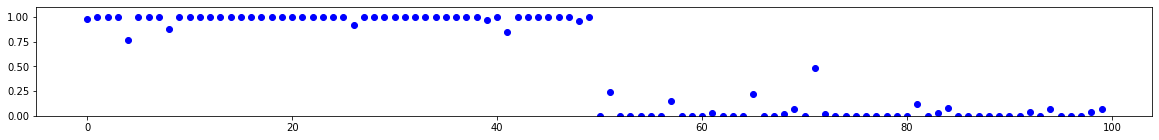

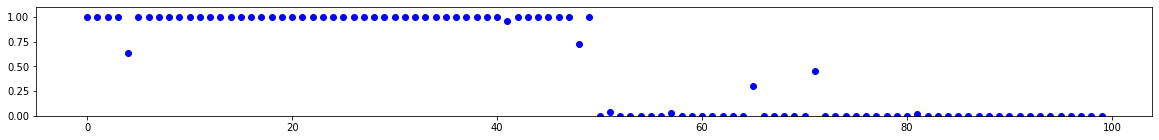

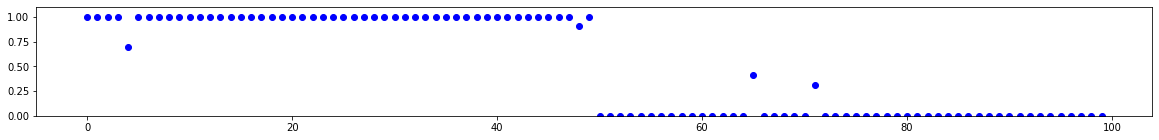

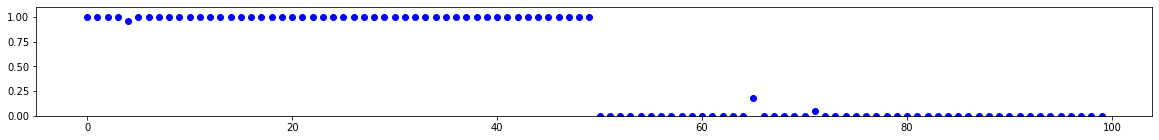

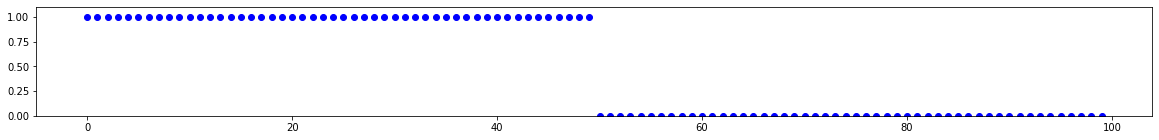

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [5]:
n = 100
rho = 0.1
N = 1000; Nel = int(N*rho); eps = 0.01
p = 0.5*np.ones(n)
i = 0
pstart = p
ps = np.zeros((1000,n))
ps[0] = pstart
pdist = np.zeros((1,1000))
while np.max(np.minimum(p,1-p)) > eps:
    if i%20 == 0 :
      plt.figure(figsize=(20, 2))
      plt.ylim(0, 1.1)
      plt.plot(p, 'bo')
      plt.show()
    i += 1
    X = (np.random.uniform(size=(N,n)) < p).astype(int)
    X_tmp = np.array(X, copy=True)  
    SX = Snoisy(X_tmp)
    ids = np.argsort(SX,axis=0)
    Elite = X[ids[0:Nel],:] 
    p = np.mean(Elite,axis=0)
    ps[i] = p

plt.figure(figsize=(20, 2))
plt.ylim(0, 1.1)
plt.plot(p, 'bo')
plt.show()   
print(p)